In [ ]:
# Import jeopardy.csv and create a dataframe from the data. Find out the following:
a. How many rows are there in the dataframe? What does a row represent in this
dataset? What is the “grain”?
b. Clean the data. How do you need to “clean” it? What is “dirty” about this data?
c. How many unique shows were there each year?
d. How many times was each category used?
e. Which month (over the years) has had the most shows?
f. Are there any answers that appeared multiple times? Find the questions for the top
three most common answers.

In [214]:
import pandas as pd
import numpy as np
import datetime
df = pd.read_csv("JEOPARDY_CSV.csv")
len(df)

216930

In [225]:
df.head(2)
df.dropna()

,ShowNumber,AirDate,Round,Category,Value,Question,Answer,year,month
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,2004,12
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,2004,12
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,2004,12
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,2004,12
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,2004,12
...,...,...,...,...,...,...,...,...,...
216925,4999,5/11/2006,Double Jeopardy!,RIDDLE ME THIS,"$2,000",This Puccini opera turns on the solution to 3 ...,Turandot,2006,5
216926,4999,5/11/2006,Double Jeopardy!,"""T"" BIRDS","$2,000",In North America this term is properly applied...,a titmouse,2006,5
216927,4999,5/11/2006,Double Jeopardy!,AUTHORS IN THEIR YOUTH,"$2,000","In Penny Lane, where this ""Hellraiser"" grew up...",Clive Barker,2006,5
216928,4999,5/11/2006,Double Jeopardy!,QUOTATIONS,"$2,000","From Ft. Sill, Okla. he made the plea, Arizona...",Geronimo,2006,5


In [226]:
df.columns = df.columns.str.replace(' ', '')
print(df.columns)

Index(['ShowNumber', 'AirDate', 'Round', 'Category', 'Value', 'Question',
       'Answer', 'year', 'month'],
      dtype='object')


In [227]:
df['year'] = pd.DatetimeIndex(df['AirDate']).year
df.head()

,ShowNumber,AirDate,Round,Category,Value,Question,Answer,year,month
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,2004,12
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,2004,12
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,2004,12
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,2004,12
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,2004,12


In [230]:
#Are there any answers that appeared multiple times? Find the questions for the top
#three most common answers.
answer = df['Answer'].value_counts()
#answer
#answer_list = ['China', 'Australia', 'Japan']
print(df.loc[df['Answer']=='China', 'Question'])
print(df.loc[df['Answer']=='Australia', 'Question'])
print(df.loc[df['Answer']=='Japan', 'Question'])

#filt = df['Answer'].isin(answer_list)
#df.loc[filt,'Answer']
#df_china = df['Answer'] =='China'
#df[df_china]


598       In 1958 this country launched its second 5-yea...
1507      In 1999 this country began 3 "golden weeks" of...
3050      P.F. Chang's is an upscale bistro specializing...
3476      This country's National People's Congress has ...
5990      Of the 6 nations India borders, this one is th...
                                ...                        
214506    Principal mountain ranges in this large countr...
215115                                      Dr. Sun Yat-Sen
215556                                             Tsingtao
215912    Because of a policy adopted in 1979, this coun...
216150    Colorful patches called p'u-fang used to indic...
Name: Question, Length: 216, dtype: object


In [220]:
#Which month (over the years) has had the most shows?
df['month'] = pd.DatetimeIndex(df['AirDate']).month
df['month'].value_counts()

11    25672
1     21128
5     21052
12    20875
10    20510
3     19731
4     19654
6     19331
2     17501
9     16053
7     15423
Name: month, dtype: int64

In [287]:
#How many times was each category used?
cat_count= df['Category'].value_counts()
count = cat_count.head(5)
newdf = pd.DataFrame({'count':count})
newdf.index.name ='cat_list'
newdf
#cat_count = cat.head(5)
#cat_count
#cat_count
#top five from category
#top_categories = (df['Category'].value_counts()).head(5)
#for value in top_categories:
    #print(value)



,count
cat_list,
BEFORE & AFTER,547
SCIENCE,519
LITERATURE,496
AMERICAN HISTORY,418
POTPOURRI,401


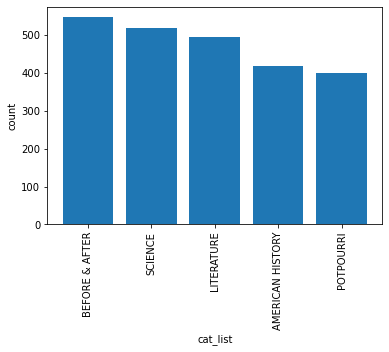

In [295]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ax.bar(newdf.index, newdf['count'])
ax.set_xlabel("cat_list")
ax.set_ylabel("count")
plt.xticks(rotation=90)
plt.show()

    

In [232]:
year_col= df.groupby("year")
show_unique = year_col["ShowNumber"].unique()
show_unique
#How many unique shows were there each year?
    
#data = {"year_col": year_col,
       #"show_unique":show_unique }
#year_df = pd.DataFrame(data)
#year_df

year
1984    [62, 10, 13, 59, 64, 58, 14, 61, 4, 1, 57, 66,...
1985    [308, 307, 306, 311, 278, 279, 276, 312, 314, ...
1986    [422, 423, 496, 369, 503, 499, 497, 498, 446, ...
1987    [732, 731, 734, 618, 663, 739, 621, 606, 737, ...
1988    [776, 958, 980, 838, 966, 961, 967, 839, 778, ...
1989    [1191, 1103, 1210, 1194, 1206, 1162, 1227, 119...
1990    [1279, 1302, 1276, 1274, 1291, 1429, 1329, 124...
1991    [1658, 1526, 1480, 1657, 1532, 1531, 1605, 165...
1992    [1800, 1740, 1875, 1908, 1795, 1799, 1856, 189...
1993    [2047, 2120, 2124, 2126, 2118, 2020, 2019, 212...
1994    [2349, 2341, 2339, 2355, 2340, 2236, 2350, 235...
1995    [2515, 2576, 2579, 2572, 2513, 2595, 2582, 254...
1996    [2825, 2735, 2818, 2679, 2778, 2835, 2832, 268...
1997    [3036, 3060, 3003, 3010, 2893, 3014, 2903, 305...
1998    [3113, 3112, 3214, 3254, 3191, 3255, 3102, 310...
1999    [3362, 3447, 3461, 3403, 3436, 3343, 3331, 348...
2000    [3751, 3673, 3619, 3534, 3632, 3697, 3537, 354...
2001    [

In [242]:
# Create a visualization that shows the top 5 categories 
#(those referenced the most often). Be sure to label appropriately.
top_categories

BEFORE & AFTER      547
SCIENCE             519
LITERATURE          496
AMERICAN HISTORY    418
POTPOURRI           401
Name: Category, dtype: int64

In [ ]:
fig, ax = plt.subplots()
ax.scatter()